In [1]:
# basic 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50, 'display.max_rows', 200)
from itertools import combinations

# plot

import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)


# models
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
from scipy.stats.mstats import gmean
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization
from sklearn.ensemble import VotingClassifier
from vecstack import StackingTransformer
from vecstack import stacking

%run import_modules.py  
%matplotlib inline

# For DNN modeling
import tensorflow as tf

# Tensorflow warning off
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
#  tf.logging.set_verbosity(tf.logging.ERROR) <- logging이 버전업그레이드에서 사용 X라함

# from tensorflow import set_random_seed 
# 위에 코드 안됨에 대한 답변: In Tensoflow2 there is no need to perform
# from tensorflow import set_random_seed
# in order to run
# set_random_seed(x)
# (as it was in older version)
# Only have to run
# import tensorflow
# tensorflow.random.set_seed(x)

tf.random.set_seed(2020)
import keras
from keras import backend as K
from keras.layers import * #Input, Dense
from keras.models import * #Model
from keras.optimizers import *
from keras.initializers import *
from keras.regularizers import *
from keras.utils.np_utils import *
from keras.utils.vis_utils import * #model_to_dot

Using TensorFlow backend.


In [2]:
train = pd.read_csv('X_train_after_percentile_nm&mclas.csv',encoding='cp949')
test = pd.read_csv('X_test_after_percentile_nm&mclas.csv',encoding='cp949')
y_train = pd.read_csv('y_train.csv', encoding='cp949').gender 

In [3]:
df_train = pd.read_csv('X_train.csv', encoding='cp949')
df_test = pd.read_csv('X_test.csv', encoding='cp949')
IDtest = df_test.cust_id.unique()

In [4]:
train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265
0,5.977337e-02,6.151699e-02,6.736158e-02,5.591807e-02,3.984869e-02,6.069313e-02,6.897703e-02,5.745252e-02,4.763285e-02,0.060051,4.501117e-02,4.416418e-02,0.045114,0.047895,4.809444e-02,5.530627e-02,4.823761e-02,5.237021e-02,5.775545e-02,4.988667e-02,4.752180e-02,4.764997e-02,4.855341e-02,3.558174e-02,0.039968,...,-0.095258,0.004091,-0.056829,0.092960,-0.075521,0.001971,-0.013615,-0.015791,-0.065005,-0.076567,-0.030695,0.040576,-0.024952,-0.020340,-0.013473,0.029223,-0.001905,-0.035456,-0.021344,0.149612,0.031331,0.257551,0.015236,0.104851,-0.025511
1,1.365995e-02,5.761599e-02,6.463000e-02,6.318288e-02,5.447783e-02,2.278225e-02,2.748601e-02,3.078676e-02,2.655345e-02,0.026076,4.025841e-02,2.979891e-02,0.016800,0.026283,2.867368e-02,2.547931e-02,2.054055e-02,3.164230e-03,3.049353e-02,8.536459e-03,1.360771e-02,1.525551e-03,2.264459e-02,1.525089e-02,0.028374,...,-0.042323,-0.042039,-0.021185,0.088214,-0.042683,-0.058574,-0.121577,-0.049310,0.038171,-0.059494,-0.045081,-0.006719,-0.086771,0.078684,-0.048978,-0.031597,0.105457,-0.135175,-0.011059,-0.181906,0.040177,-0.367597,0.387911,-0.176044,0.011116
2,3.497547e-03,5.263007e-02,3.574232e-03,6.179401e-05,1.452202e-02,2.454717e-02,2.496620e-02,2.627401e-02,1.097601e-02,0.010620,3.559260e-02,1.925952e-02,0.003805,0.021173,2.858749e-05,2.845683e-03,9.205828e-03,2.507978e-03,4.542108e-02,2.424087e-02,8.066580e-03,1.664376e-02,3.383588e-02,1.802468e-02,0.002398,...,-0.085213,-0.010425,-0.037716,0.182009,-0.039425,-0.019664,-0.067786,-0.003719,0.006765,-0.049404,0.073129,0.050179,-0.048981,0.103711,-0.080562,-0.017810,0.007759,-0.097820,-0.162288,-0.452104,0.292490,0.068061,0.386233,-0.054269,0.179784
3,4.250513e-02,3.941661e-02,2.824801e-02,4.400417e-02,3.688942e-02,5.410677e-02,3.160908e-02,6.179994e-02,4.185728e-02,0.042664,4.999636e-02,3.566558e-02,0.044427,0.031433,4.165090e-02,4.371939e-02,3.953292e-02,2.934077e-02,4.416784e-02,2.966241e-02,3.880565e-02,3.442458e-02,4.692035e-02,2.886416e-02,0.032945,...,-0.091597,-0.005280,-0.040777,0.094060,-0.053894,-0.009735,0.009642,-0.034146,-0.110949,-0.079022,-0.021589,0.043457,-0.045557,0.019623,0.004612,0.025322,-0.013239,-0.031842,-0.052557,0.237949,0.085064,0.331622,0.149253,0.164987,0.106727
4,5.702126e-02,5.004024e-02,8.137117e-02,4.469287e-02,1.178961e-02,2.243617e-02,8.216921e-02,4.900240e-02,6.015503e-02,0.041257,5.544225e-02,4.466740e-02,0.013530,0.020464,3.996417e-02,7.513038e-02,5.636473e-02,9.581305e-02,5.620712e-02,3.818345e-02,1.369156e-02,5.722443e-02,1.492051e-02,3.656504e-02,0.019958,...,-0.127000,0.031732,-0.097430,0.089688,-0.111951,0.004823,0.003882,0.038463,-0.055445,-0.068560,-0.048871,0.046427,-0.006387,-0.034586,0.047486,0.031552,0.004871,-0.012680,0.095767,0.056328,0.066425,0.379409,-0.107879,0.112735,-0.069668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3.607101e-02,1.636153e-02,1.173026e-02,7.821802e-03,3.840035e-02,4.302986e-02,4.711241e-03,8.589006e-03,1.499849e-02,0.002723,1.812895e-02,3.588150e-02,0.023826,0.025563,2.989874e-02,1.132488e-02,5.694571e-02,8.058683e-03,7.918263e-02,5.590170e-03,1.276666e-02,2.375306e-02,6.860821e-03,2.755681e-03,0.009689,...,-0.075944,-0.011860,-0.042765,0.087820,-0.066206,-0.024408,-0.000097,-0.057080,-0.078384,-0.069073,-0.032063,0.045592,-0.060147,0.013222,0.012960,0.031584,0.014085,-0.035005,-0.034020,-0.170445,-0.099762,0.218327,0.145438,0.044994,0.022955
3496,6.030129e-02,3.547876e-02,5.457724e-02,7.359145e-02,5.336193e-02,4.219899e-02,3.772581e-02,3.719372e-02,2.389350e-02,0.027022,3.032051e-02,2.965035e-02,0.063328,0.045947,4.277379e-02,4.574230e-02,3.399645e-02,3.132514e-02,5.098109e-02,2.248874e-02,4.305952e-02,3.144567e-02,6.116390e-02,

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

DNN learning curve 1/20


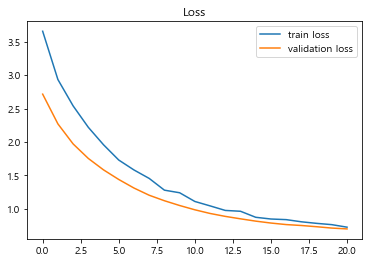

  5%|████▏                                                                              | 1/20 [00:04<01:18,  4.15s/it]

AUC 0.7504405058043118
DNN learning curve 2/20


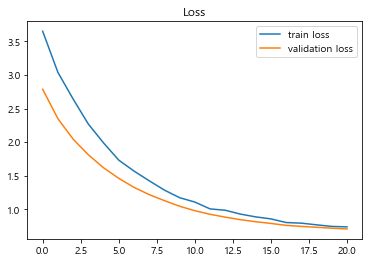

AUC

 10%|████████▎                                                                          | 2/20 [00:07<01:13,  4.06s/it]

 0.7143860731297762
DNN learning curve 3/20


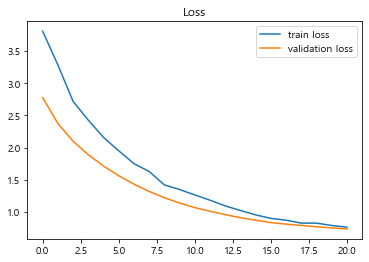

 15%|████████████▍                                                                      | 3/20 [00:11<01:07,  3.99s/it]

AUC 0.7107682150595883
DNN learning curve 4/20


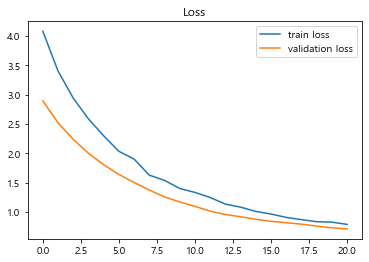

 20%|████████████████▌                                                                  | 4/20 [00:16<01:06,  4.17s/it]

AUC 0.742002390807879
DNN learning curve 5/20


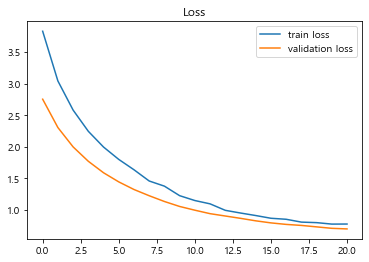

 25%|████████████████████▊                                                              | 5/20 [00:21<01:04,  4.31s/it]

AUC 0.7669777777777778
DNN learning curve 6/20


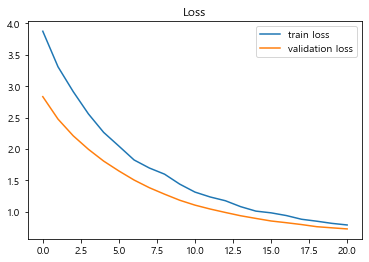

 30%|████████████████████████▉                                                          | 6/20 [00:25<01:02,  4.43s/it]

AUC 0.7648751890070828
DNN learning curve 7/20


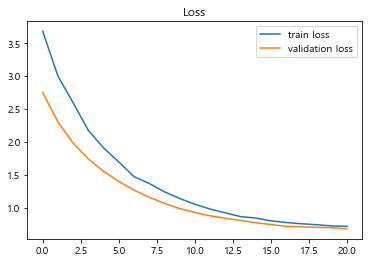

AUC

 35%|█████████████████████████████                                                      | 7/20 [00:30<00:57,  4.40s/it]

 0.7633598161983934
DNN learning curve 8/20


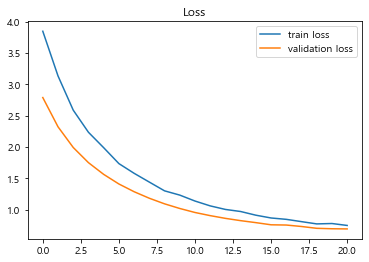

 40%|█████████████████████████████████▏                                                 | 8/20 [00:34<00:54,  4.55s/it]

AUC 0.7657453171448013
DNN learning curve 9/20


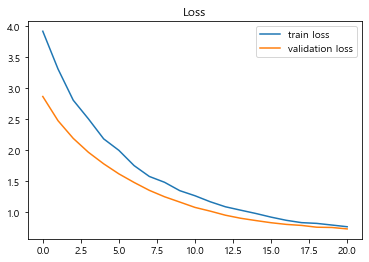

 45%|█████████████████████████████████████▎                                             | 9/20 [00:40<00:51,  4.73s/it]

AUC 0.7359078486961408
DNN learning curve 10/20


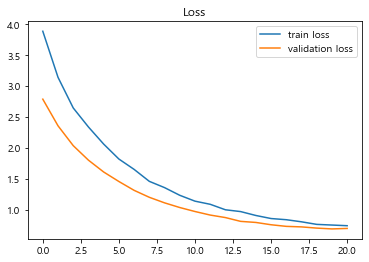

 50%|█████████████████████████████████████████                                         | 10/20 [00:45<00:48,  4.87s/it]

AUC 0.7474486204954953
DNN learning curve 11/20


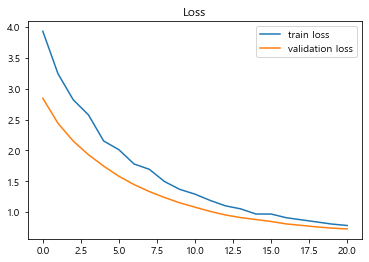

 55%|█████████████████████████████████████████████                                     | 11/20 [00:50<00:45,  5.02s/it]

AUC 0.7499804230364306
DNN learning curve 12/20


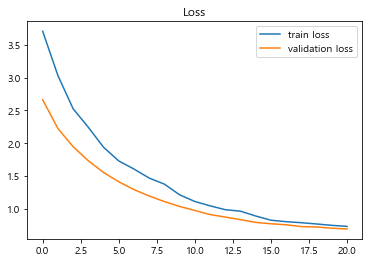

 60%|█████████████████████████████████████████████████▏                                | 12/20 [00:56<00:40,  5.10s/it]

AUC 0.7532328238662411
DNN learning curve 13/20


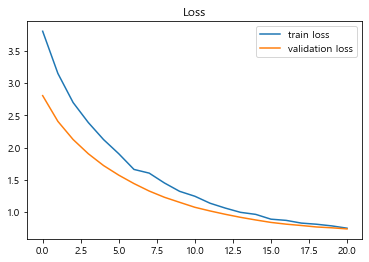

 65%|█████████████████████████████████████████████████████▎                            | 13/20 [01:01<00:37,  5.31s/it]

AUC 0.7394445557447661
DNN learning curve 14/20


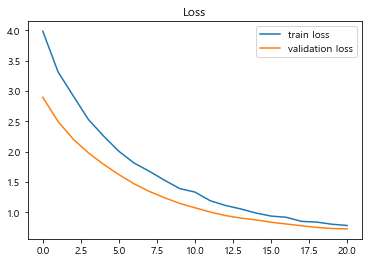

 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [01:07<00:33,  5.50s/it]

AUC 0.7798027519707208
DNN learning curve 15/20


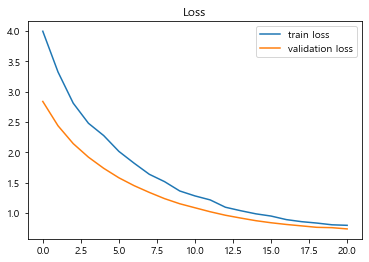

 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [01:14<00:28,  5.77s/it]

AUC 0.7288163111840307
DNN learning curve 16/20


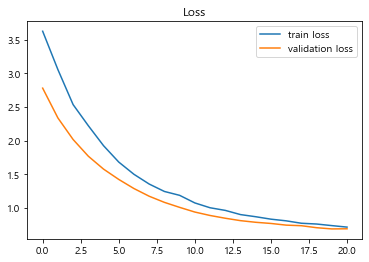

 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [01:20<00:23,  5.87s/it]

AUC 0.7444849807357905
DNN learning curve 17/20


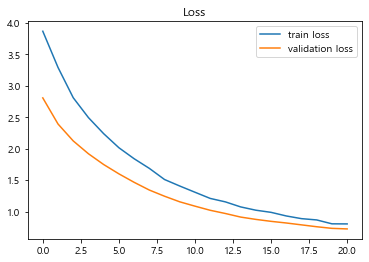

 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [01:26<00:17,  5.99s/it]

AUC 0.7764397444371007
DNN learning curve 18/20


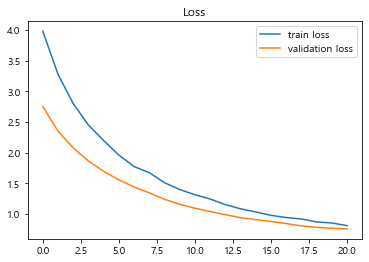

 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [01:33<00:12,  6.32s/it]

AUC 0.7411519169385107
DNN learning curve 19/20


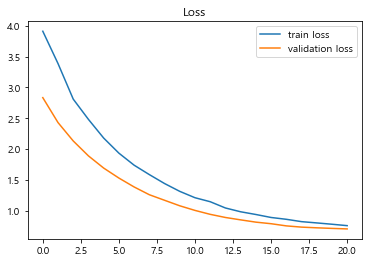

 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [01:40<00:06,  6.48s/it]

AUC 0.759678204058938
DNN learning curve 20/20


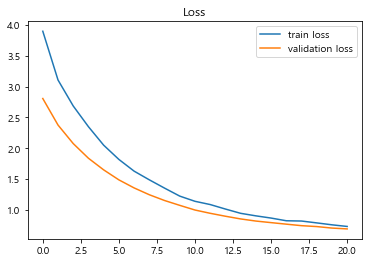

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:47<00:00,  5.36s/it]

AUC 0.7637061980427232

Validation Summary:
13    0.779803
16    0.776440
4     0.766978
7     0.765745
5     0.764875
19    0.763706
6     0.763360
18    0.759678
11    0.753233
0     0.750441
10    0.749980
9     0.747449
15    0.744485
3     0.742002
17    0.741152
12    0.739445
8     0.735908
14    0.728816
1     0.714386
2     0.710768
dtype: float64
mean=0.74993, std=0.019


In [5]:
# Set hyper-parameters for power mean ensemble 
N = 20
p = 3.5
preds = []
aucs = []

for i in tqdm(range(N)):    
    X_train, X_test = train, test

    ##### STEP 1: Randomize Seed
    SEED = np.random.randint(1, 10000)              
    random.seed(SEED)       
    np.random.seed(SEED)     
    if tf.__version__[0] < '2':  
        tf.set_random_seed(SEED)
    else:
        tf.random.set_seed(SEED)


    ##### STEP 4: Build a DNN Model

    # Define the Model architecture
    model = Sequential()
    model.add(Dense(40, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.040)))
    model.add(BatchNormalization())
    model.add(Dropout(0.6))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.7))
    model.add(BatchNormalization())
    model.add(Dropout(0.9))
    
    model.add(Dense(1, activation='sigmoid'))

    # Train the Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])  # adam,  , , , 
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2)
    history = model.fit(train_x, train_y, epochs=21, batch_size=64, 
                        validation_data=(valid_x,valid_y), callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)], verbose=0)


    print(f'DNN learning curve {i+1}/{N}')
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.legend()
    plt.title("Loss")
    plt.show()
    
    # Make Prediction
    auc = roc_auc_score(valid_y, model.predict(valid_x).flatten())
    aucs.append(auc)
    print('AUC', auc)
    preds.append(model.predict(X_test).flatten())   

### Validate the Models
print('\nValidation Summary:')
aucs = pd.Series(aucs)
print(aucs.sort_values(ascending=False))
print('mean={:.5f}, std={:.3f}'.format(aucs.mean(), aucs.std()))   

In [10]:
N = 20
p = [2.56, 3.5, 4.5]
for j in p:
    # Power mean ensemble
    THRESHOLD = 0.77  # Use only models whose AUC exceeds this value

    pred = 0
    n = 0
    for i in range(N):
        if aucs.iloc[i] > THRESHOLD:
            pred = pred + preds[i]**j
            n += 1
    pred = pred / n    
    pred = pred**(1/j)

    # Make a submission file
    t = pd.Timestamp.now()
    fname = f"dae_p{j}n{n}_submit_{t.month:02}{t.day:02}{t.hour:02}{t.minute:02}.csv"
    submissions = pd.concat([pd.Series(IDtest, name="cust_id"), pd.Series(pred, name="gender")] ,axis=1)
    submissions.to_csv(fname, index=False)
    print(f"'{fname}' is ready to submit.")

'dae_p2.56n5_submit_06132209.csv' is ready to submit.
'dae_p3.5n5_submit_06132209.csv' is ready to submit.
'dae_p4.5n5_submit_06132209.csv' is ready to submit.
